## Part 2: Clinical Application

### Contents
Fill out this notebook as part 2 of your final project submission.

**You will have to complete the Code (Load Metadata & Compute Resting Heart Rate) and Project Write-up sections.**  

- [Code](#Code) is where you will implement some parts of the **pulse rate algorithm** you created and tested in Part 1 and already includes the starter code.
  - [Imports](#Imports) - These are the imports needed for Part 2 of the final project. 
    - [glob](https://docs.python.org/3/library/glob.html)
    - [os](https://docs.python.org/3/library/os.html)
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
  - [Load the Dataset](#Load-the-dataset)  
  - [Load Metadata](#Load-Metadata)
  - [Compute Resting Heart Rate](#Compute-Resting-Heart-Rate)
  - [Plot Resting Heart Rate vs. Age Group](#Plot-Resting-Heart-Rate-vs.-Age-Group)
- [Project Write-up](#Project-Write-Up) to describe the clinical significance you observe from the **pulse rate algorithm** applied to this dataset, what ways/information that could improve your results, and if we validated a trend known in the science community. 

### Dataset (CAST)

The data from this project comes from the [Cardiac Arrythmia Suppression Trial (CAST)](https://physionet.org/content/crisdb/1.0.0/), which was sponsored by the National Heart, Lung, and Blood Institute (NHLBI). CAST collected 24 hours of heart rate data from ECGs from people who have had a myocardial infarction (MI) within the past two years.<sup>1</sup> This data has been smoothed and resampled to more closely resemble PPG-derived pulse rate data from a wrist wearable.<sup>2</sup>

1. **CAST RR Interval Sub-Study Database Citation** - Stein PK, Domitrovich PP, Kleiger RE, Schechtman KB, Rottman JN. Clinical and demographic determinants of heart rate variability in patients post myocardial infarction: insights from the Cardiac Arrhythmia Suppression Trial (CAST). Clin Cardiol 23(3):187-94; 2000 (Mar)
2. **Physionet Citation** - Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

-----

### Code
#### Imports

When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages are imported for you here. We recommend you don't import other packages outside of the [Standard Library](https://docs.python.org/3/library/) , otherwise the grader might not be able to run your code.

In [40]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the dataset

The dataset is stored as [.npz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html) files. Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz. The subject ID is the name of the file. You will use these files to compute resting heart rate.

Demographics metadata is stored in a file called 'metadata.csv'. This CSV has three columns, one for subject ID, age group, and sex. You will use this file to make the association between resting heart rate and age group for each gender.

Find the dataset in `../datasets/crisdb/`

In [11]:
hr_filenames = glob.glob('./datasets/crisdb/*.npz')

#### Load Metadata
Load the metadata file into a datastructure that allows for easy lookups from subject ID to age group and sex.

In [12]:
metadata_filename = './datasets/crisdb/metadata.csv'

# Load the metadata file into this variable.
with open(metadata_filename, 'r') as f:
    metadata = pd.read_csv(f)

#### Compute Resting Heart Rate
For each subject we want to compute the resting heart rate while keeping track of which age group this subject belongs to. An easy, robust way to compute the resting heart rate is to use the lowest 5th percentile value in the heart rate timeseries.

In [28]:
def AgeAndRHR(metadata, filename):

    # Load the heart rate timeseries
    hr_data = np.load(filename)['hr']
    
    # Compute the resting heart rate from the timeseries by finding the lowest 5th percentile value in hr_data
    rhr = np.percentile(hr_data, 5)

    # Find the subject ID from the filename.
    subject = filename.split("\\")[-1].split(".")[0]
    # Find the age group for this subject in metadata.
    age_group = metadata[metadata['subject']==subject]['age'].values[0]
    # Find the sex for this subject in metadata.
    sex = metadata[metadata['subject']==subject]['sex'].values[0]

    return age_group, sex, rhr

df = pd.DataFrame(data=[AgeAndRHR(metadata, filename) for filename in hr_filenames],
                  columns=['age_group', 'sex', 'rhr'])

#### Plot Resting Heart Rate vs. Age Group
We'll use [seaborn](https://seaborn.pydata.org/) to plot the relationship. Seaborn is a thin wrapper around matplotlib, which we've used extensively in this class, that enables higher-level statistical plots.

We will use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) to plot the mean of the resting heart rates for each age group along with the 95% confidence interval around the mean. Learn more about making plots that show uncertainty [here](https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty).

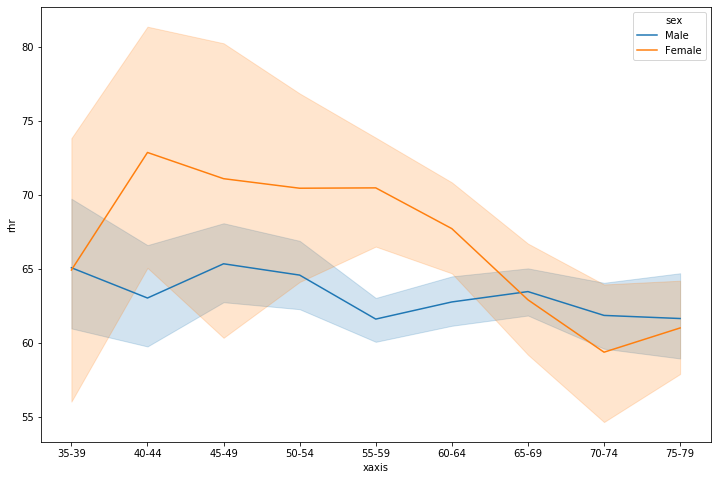

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

labels = sorted(np.unique(df.age_group))
df['xaxis'] = df.age_group.map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='xaxis', y='rhr', hue='sex', data=df)
_ = plt.xticks(np.arange(len(labels)), labels)

### Clinical Conclusion
Answer the following prompts to draw a conclusion about the data.
> 1. For women, we see .... 
> 2. For men, we see ... 
> 3. In comparison to men, women's heart rate is .... 
> 4. What are some possible reasons for what we see in our data?
> 5. What else can we do or go and find to figure out what is really happening? How would that improve the results?
> 6. Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? How?

Your write-up will go here...

## Women HR Analysis

In [63]:
df[df['sex']=='Female'].describe()[['rhr']]

,rhr
count,277.000000
mean,65.965632
std,14.393868
min,1.558870
25%,57.744361
50%,66.300003
75%,75.247986
max,101.726316


We can see that for women the variance is high at ages between 35-55. After 55 women's Heart rate does not fluctate that much. Meaning that there is high uncertainty at the beginning and less after 55 years old

## Men HR Analysis

In [64]:
df[df['sex']=='Male'].describe()[['rhr']]

,rhr
count,1260.000000
mean,63.016196
std,13.064686
min,16.365223
25%,53.782763
50%,61.687742
75%,70.369667
max,109.714286


We can see that for men the variance is more consistent along the years. Meaning there is less uncertainty that men's heart rate is around 63 BPM

## Women vs Men Comparison

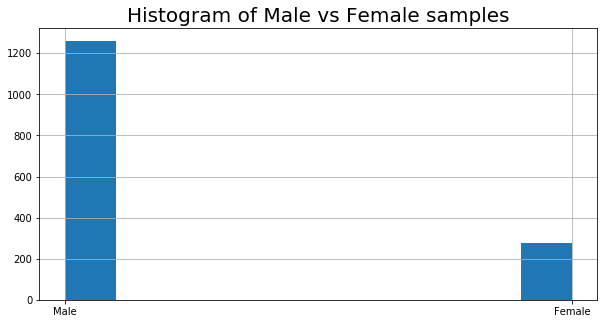

In [45]:
plt.figure(figsize=(10,5))
df['sex'].hist();
plt.title('Histogram of Male vs Female samples', fontsize=20);

From above we can see that perhaps the uncertainty from womens data is due to the lower number of samples compared to the men. 

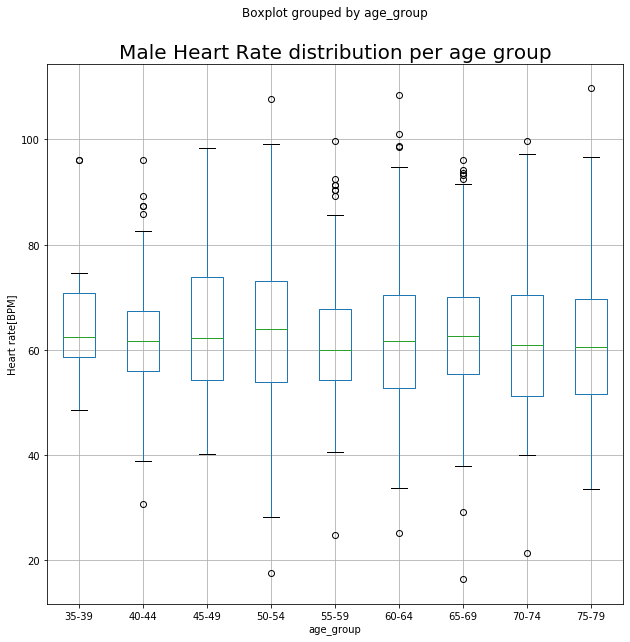

In [60]:
plt.figure(figsize=(10,10));
ax=plt.subplot(111)
df[df['sex']=='Male'].boxplot("rhr", by="age_group", ax=ax);
ax.set_title('Male Heart Rate distribution per age group', fontsize=20)
ax.set_ylabel('Heart rate[BPM]');

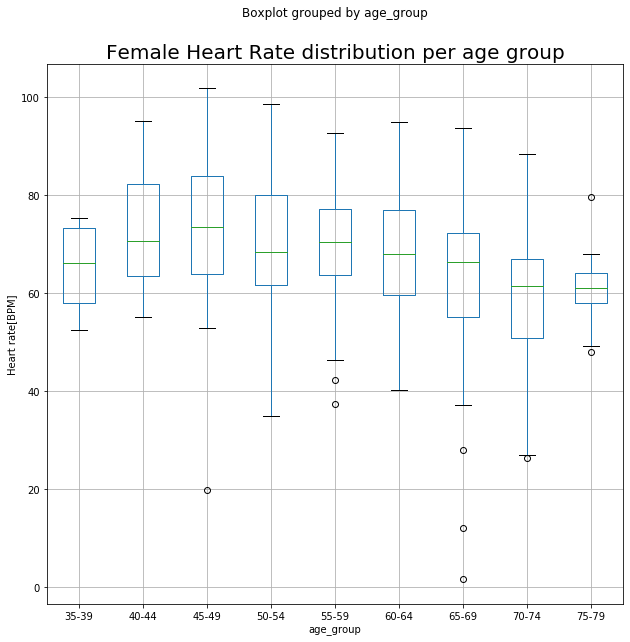

In [61]:
plt.figure(figsize=(10,10));
ax=plt.subplot(111)
df[df['sex']=='Female'].boxplot("rhr", by="age_group", ax=ax);
ax.set_title('Female Heart Rate distribution per age group', fontsize=20)
ax.set_ylabel('Heart rate[BPM]');

Based on the limited data we have we can also say that in general women tend to have higher age than men at younger ages. However, both sex converge to around the same heart rate values at older ages, which would around 65 BPM.

## Further Analysis of the results
* **What are some possible reasons for what we see in our data?**

    **Answer:** A possible reason of these results could be that women in general have smaller hearts. Thus, their Circulatory system compensates this fact by making their heart beat faster than men's hearts. In other words, as the female organ is smaller, it beats slightly faster to make up for its size.


* **What else can we do or go and find to figure out what is really happening? How would that improve the results?**

    **Answer:** To be sure about these results we must have an even number of samples for men and women in the dataset. Otherwise, the analysis will be more accurate for men than women. We can also take into accound other features of the life of each gender such as health, diet, or daily activities


* **Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? How?**

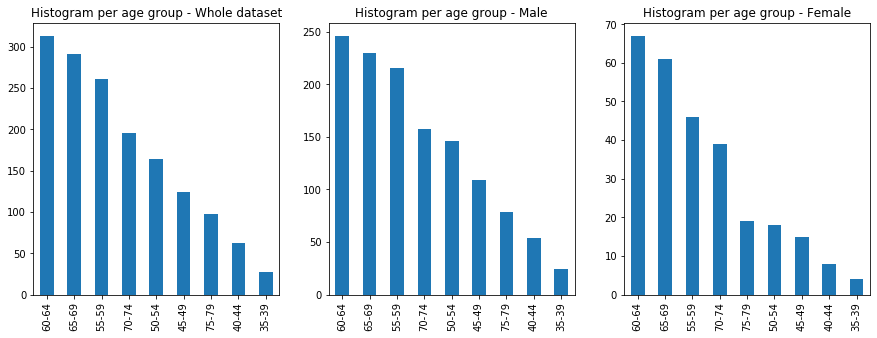

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(131)
df['age_group'].value_counts().plot(kind='bar');
plt.title('Histogram per age group - Whole dataset', fontsize=12);
plt.subplot(132)
df[df['sex']=='Male']['age_group'].value_counts().plot(kind='bar');
plt.title('Histogram per age group - Male', fontsize=12);
plt.subplot(133)
df[df['sex']=='Female']['age_group'].value_counts().plot(kind='bar');
plt.title('Histogram per age group - Female', fontsize=12);

**Answer** we definitely did not validate the trend that heart rate increases up to middle age and then decreases. It does sound intuitive and logical. However, as shown in the plots above, we have significantly more data for ages after middle age than before middle age. Moreover, data for ages between 35 and 45 for women are less than 10 samples which are very few data. To ensure that our conclusions are right. I would suggest we get more data as balanced as possible for each age group. 